

[------------------------------] 1/180  (0.6%)
Running iteration with runName=PE_density900_FI0.5_tHalf10000_hFactor10_tFrag36 ...


c:\Users\rakes\Pictures\Model\UTOPIA_model-main\functions\RC_generator.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  t_half_d = float(process_inputs_df.loc[cond, "thalf_deg_d"])


Difference inflow-outflow = -1.1059455573558807e-09


c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Completed run: PE_density900_FI0.5_tHalf10000_hFactor10_tFrag36

[------------------------------] 2/180  (1.1%)
Running iteration with runName=PE_density900_FI0.5_tHalf10000_hFactor10_tFrag100 ...


c:\Users\rakes\Pictures\Model\UTOPIA_model-main\functions\RC_generator.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  t_half_d = float(process_inputs_df.loc[cond, "thalf_deg_d"])


Difference inflow-outflow = -3.7834979593753815e-10


c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Completed run: PE_density900_FI0.5_tHalf10000_hFactor10_tFrag100

[------------------------------] 3/180  (1.7%)
Running iteration with runName=PE_density900_FI0.5_tHalf10000_hFactor10_tFrag1000 ...


c:\Users\rakes\Pictures\Model\UTOPIA_model-main\functions\RC_generator.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  t_half_d = float(process_inputs_df.loc[cond, "thalf_deg_d"])


Difference inflow-outflow = -2.0372681319713593e-10


c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

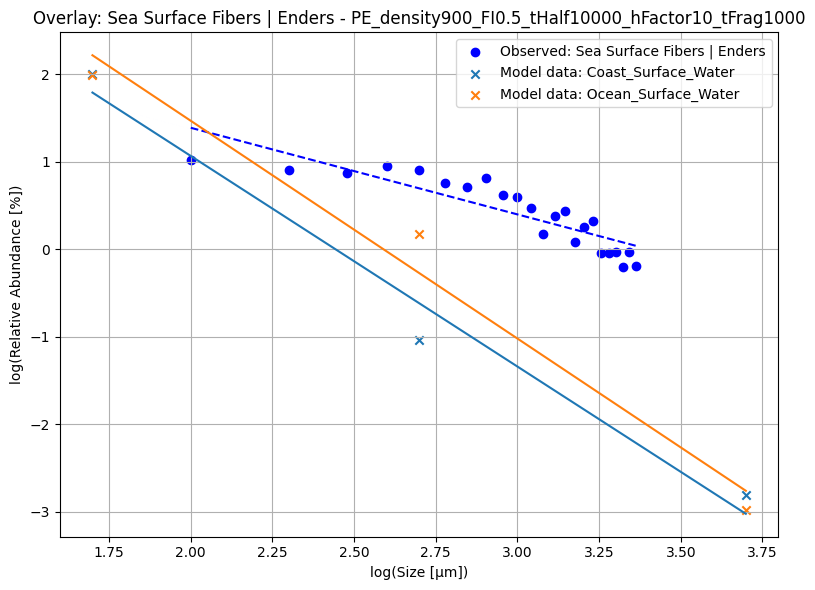

In [ ]:

import math
import datetime
import re
import numpy as np
import pandas as pd
import string
from datetime import datetime
import matplotlib.pyplot as plt
import sys

# -------------------------------------------------------------------
# 1) IMPORT YOUR MODEL FUNCTIONS
# -------------------------------------------------------------------
# Make sure these paths are correct for your environment
from functions import create_inputsTable_UTOPIA
from functions.create_rateConstants_tabel import *
from functions.fillInteractions_df_fun import *
from functions.generate_modelObjects import *
from functions.generateRateConstants_particles import *
from functions.solver_SteadyState import *
from functions.extract_results import *
from functions.massBalance import *
from functions.exposure_indicators_calculation import *
from functions.generate_MPinputs_table import *
from functions.save_results import *
from functions.loop_CTD_calculation import *
from functions.generate_compartmentFlows_tables import *
from functions.emission_fractions_calculation import *
from helpers.helpers import *

#############################################
# 2) DEFINE YOUR PARAMETER GRIDS
#############################################
mpdensity_list = [900,1000,1100,1500,1800]
FI_list = [0.5,1]
t_half_list = [10000,66000,100000]
Input_heter_deg_factor_const = [10,20]
t_frag_list = [36,100,1000]

# Other constant parameters
Input_biof_deg_factor = 1/2
Input_factor_deepWater_soilSurface = 10
Input_factor_sediment = 100
Input_biof_frag_factor = 2
Input_heter_frag_factor = 100

MP_composition = "PE"
shape = "sphere"
N_sizeBins = 5
big_bin_diameter_um = 5000
Input_size_bin = "e"
Input_MP_form = "freeMP"
Input_emiss_comp = "Beaches_Soil_Surface"      
                                             #"Ocean_Surface_Water","Ocean_Mixed_Water","Ocean_Column_Water",
                                             #"Coast_Surface_Water","Coast_Column_Water","Surface_Freshwater",
                                             #"Bulk_Freshwater","Sediment_Freshwater",
                                             #"Beaches_Soil_Surface",Background_Soil_Surface"
                                             #"Impacted_Soil_Surface","Impacted_Soil","Air"
Input_input_flow_g_s = 250000  # g/s

#############################################
# 3) SETUP WORKING DIRECTORY, FOLDERS
#############################################
cwd = os.getcwd()
inputs_path = os.path.join(cwd, "inputs") + os.sep

new_results_folder = os.path.join(cwd, "new results")
os.makedirs(new_results_folder, exist_ok=True)

new_plots_folder = os.path.join(cwd, "new plots")
os.makedirs(new_plots_folder, exist_ok=True)

overlay_plots_folder = os.path.join(cwd, "overlay_plots")
os.makedirs(overlay_plots_folder, exist_ok=True)

# We'll store the comparison data in this file
comparison_excel_file = "Model vs Observed Raw.xlsx"

#############################################
# 4) LOAD OBSERVED DATA
#############################################
observed_file = "observed_data_long.xlsx"
observed_df = pd.read_excel(observed_file)

observed_df = observed_df.rename(columns={
    'dataset identifier': 'Dataset',
    'Article name': 'Article',
    'log‑transformed size': 'log_Size',
    'log‑transformed abundance': 'log_Abundance'
})

#############################################
# 5) DEFINE ARTICLE->COMPARTMENTS MAPPING
#############################################
overlay_compartments_mapping = {
    "Sea Sediment | Bergmann": ["Sediment_Coast", "Sediment_Ocean"],
    "Sea Surface all | Cai": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Sea Surface Fragments | Enders": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Sea Surface Fibers | Enders": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Fragments in water | Eo": ["Bulk_Freshwater", "Surface_Freshwater"],
    "Fibers in water | Eo": ["Bulk_Freshwater", "Surface_Freshwater"],
    "Fragments in sediment | Eo": ["Sediment_Ocean", "Sediment_Coast", "Beaches_Deep_Soil","Beaches_Soil_Surface", "Sediment_Freshwater"],
    "Fibers in sediment | Eo": ["Sediment_Ocean", "Sediment_Coast", "Beaches_Deep_Soil",
    "Beaches_Soil_Surface", "Sediment_Freshwater"],
    "Sea Surface all | Erni-Cassola": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Fresh water sediments | Imhof": ["Bulk_Freshwater", "Surface_Freshwater"],
    "Sea Surface all | Isobe L1": ["Coast_Surface_Water", "Ocean_Surface_Water"], 
    "Sea Surface all | Isobe L2": ["Coast_Surface_Water", "Ocean_Surface_Water"], 
    "Sea Surface all | Isobe L3": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Sea Surface all | Isobe L4": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "FP all | Scheurer": ["Coast_Surface_Water", "Ocean_Surface_Water"], 
    "Sea Surface Fragments | Song": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Sea Surface Fibers | Song": ["Coast_Surface_Water", "Ocean_Surface_Water"],
    "Sea Surface all | Zhang": ["Coast_Surface_Water", "Ocean_Surface_Water"]
}

#############################################
# 6) RUN MODEL FOR EACH PARAMETER COMBINATION
#############################################
# We'll collect comparison rows in a list, then export to Excel at the end
comparison_rows = []
bar_length = 30  # ASCII bar length
iteration_count = 0

# 6.1) Compute total number of iterations for progress tracking
total_iterations = (
    len(mpdensity_list)
    * len(FI_list)
    * len(t_half_list)
    * len(Input_heter_deg_factor_const)
    * len(t_frag_list)
)

# Print an extra blank line so row 0 is free for the bar
print("\n")

#############################################
# 7) LOOP OVER PARAMETER COMBINATIONS
#############################################
for MPdensity_kg_m3 in mpdensity_list:
    for Input_FI in FI_list:
        for Input_t_half_deg_free in t_half_list:
            for heter_deg_factor in Input_heter_deg_factor_const:
                for Input_t_frag_gen_FreeSurfaceWater in t_frag_list:

                    # 1) Increment iteration count
                    iteration_count += 1

                    # 2) Move cursor to top line, clear it
                    sys.stdout.write("\033[H\033[2K")

                    # 3) Print updated bar
                    progress_fraction = iteration_count / total_iterations
                    filled = int(bar_length * progress_fraction)
                    bar = "#" * filled + "-" * (bar_length - filled)
                    sys.stdout.write(
                        f"[{bar}] {iteration_count}/{total_iterations}  "
                        f"({progress_fraction*100:.1f}%)\n"
                    )

                    # 4) Move down 1 line so we can print iteration details
                    sys.stdout.write("\033[1B")
                    sys.stdout.flush()

                    # Create a runName that includes all parameters
                    runName = (
                        f"{MP_composition}_density{MPdensity_kg_m3}_"
                        f"FI{Input_FI}_"
                        f"tHalf{Input_t_half_deg_free}_"
                        f"hFactor{heter_deg_factor}_"
                        f"tFrag{Input_t_frag_gen_FreeSurfaceWater}"
                    )
                    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

                    # Print iteration details
                    print(f"Running iteration with runName={runName} ...")

                    #-----------------------------------------------------
                    # MODEL CODE SECTION
                    #-----------------------------------------------------

                    # 1) Generate objects
                    MP_inputs = {
                        "MP_composition": MP_composition,
                        "shape": shape,
                        "N_sizeBins": N_sizeBins,
                        "big_bin_diameter_um": big_bin_diameter_um,
                        "runName": runName,
                        "inputs_path": inputs_path,
                    }
                    mp_imputFile_name = write_MPinputs_table(
                        MPdensity_kg_m3,
                        MP_composition,
                        shape,
                        N_sizeBins,
                        big_bin_diameter_um,
                        runName,
                        inputs_path,
                    )

                    # SPM parameters from Kooi et al. (2017)
                    v_a = 2.0e-16
                    r_a = ((3.0/4.0)*(v_a/math.pi))**(1.0/3.0)
                    spm_radius_um = r_a*1e6
                    spm_density_kg_m3 = 1388

                    comp_impFile_name = "inputs_compartments.csv"
                    comp_interactFile_name = "compartment_interactions.csv"
                    boxName = "Utopia"
                    MPforms_list = ["freeMP", "heterMP", "biofMP", "heterBiofMP"]
                    (system_particle_object_list,
                     SpeciesList,
                     spm,
                     dict_comp,
                     model_lists,
                     particles_df) = generate_objects(
                        inputs_path,
                        boxName=boxName,
                        MPforms_list=MPforms_list,
                        comp_impFile_name=comp_impFile_name,
                        comp_interactFile_name=comp_interactFile_name,
                        mp_imputFile_name=mp_imputFile_name,
                        spm_radius_um=spm_radius_um,
                        spm_density_kg_m3=spm_density_kg_m3,
                    )
                    surfComp_list = [c for c in dict_comp if "Surface" in c]

                    # Determine fragmentation style
                    frag_styles_dict = {
                        0: "erosive_fragmentation",
                        0.5: "mixed_fragmentation",
                        1: "sequential_fragmentation"
                    }
                    FI = Input_FI
                    frag_style = frag_styles_dict[FI]

                    fsd = generate_fsd_matrix(FI)
                    sizes = [list(model_lists["dict_size_coding"].keys())]
                    fsd_df = pd.DataFrame(fsd, index=sizes, columns=sizes)
                    fsd_filename = os.path.join(inputs_path, "fsd.csv")
                    fsd_df.to_csv(fsd_filename)

                    # Degradation half-times
                    t_half_deg_free = Input_t_half_deg_free
                    biof_deg_factor = Input_biof_deg_factor
                    t_half_deg_heter = t_half_deg_free*heter_deg_factor
                    t_half_deg_biof = t_half_deg_free*biof_deg_factor
                    t_half_deg_biofHeter = t_half_deg_free*biof_deg_factor*heter_deg_factor
                    thalf_deg_d_dict = {
                        "freeMP": t_half_deg_free,
                        "heterMP": t_half_deg_heter,
                        "biofMP": t_half_deg_biof,
                        "heterBiofMP": t_half_deg_biofHeter,
                    }

                    alpha_heter_filename = os.path.join(inputs_path, "alpha_heter.csv")
                    alpha_heter_df = pd.read_csv(alpha_heter_filename)
                    alpha_hetr_dict = alpha_heter_df.set_index("MP_form")["alpha_heter"].to_dict()

                    t_frag_gen_FreeSurfaceWater = Input_t_frag_gen_FreeSurfaceWater

                    process_inputs_df = create_inputsTable_UTOPIA(
                        inputs_path,
                        model_lists,
                        thalf_deg_d_dict,
                        alpha_hetr_dict,
                        t_frag_gen_FreeSurfaceWater,
                        Input_biof_frag_factor,
                        Input_heter_frag_factor,
                        Input_factor_deepWater_soilSurface,
                        Input_factor_sediment,
                        save_op="save",
                    )

                    size_codes = [letter for letter in string.ascii_lowercase[0:N_sizeBins]]
                    size_dict = dict(zip(size_codes, model_lists["dict_size_coding"].values()))
                    particle_forms_coding = dict(zip(MPforms_list, ["A", "B", "C", "D"]))
                    MP_form_dict_reverse = {v: k for k, v in particle_forms_coding.items()}

                    size_bin = Input_size_bin
                    MP_form = Input_MP_form
                    emiss_comp = Input_emiss_comp
                    input_flow_g_s = Input_input_flow_g_s

                    # Emission flows
                    q_mass_g_s_dict = {
                        "Ocean_Surface_Water": 0,
                        "Ocean_Mixed_Water": 0,
                        "Ocean_Column_Water": 0,
                        "Coast_Surface_Water": 0,
                        "Coast_Column_Water": 0,
                        "Surface_Freshwater": 0,
                        "Bulk_Freshwater": 0,
                        "Sediment_Freshwater": 0,
                        "Sediment_Ocean": 0,
                        "Sediment_Coast": 0,
                        "Beaches_Soil_Surface": 0,
                        "Beaches_Deep_Soil": 0,
                        "Background_Soil_Surface": 0,
                        "Background_Soil": 0,
                        "Impacted_Soil_Surface": 0,
                        "Impacted_Soil": 0,
                        "Air": 0,
                    }
                    q_mass_g_s_dict[emiss_comp] = input_flow_g_s

                    input_flow_filename = os.path.join(inputs_path, "inputFlows.csv")
                    input_flows_df = pd.DataFrame(
                        list(q_mass_g_s_dict.items()), columns=["compartment", "q_mass_g_s"]
                    )
                    input_flows_df.to_csv(input_flow_filename, index=False)

                    particle_compartmentCoding = dict(
                        zip(
                            model_lists["compartmentNames_list"],
                            list(range(len(model_lists["compartmentNames_list"]))),
                        )
                    )
                    comp_dict_inverse = {v: k for k, v in particle_compartmentCoding.items()}
                    sp_imputs = []
                    q_mass_g_s = []
                    for compartment in q_mass_g_s_dict.keys():
                        sp_imputs.append(
                            size_bin
                            + particle_forms_coding[MP_form]
                            + str(particle_compartmentCoding[compartment])
                            + "_" + boxName
                        )
                        q_mass_g_s.append(q_mass_g_s_dict[compartment])
                    imput_flows_g_s = dict(zip(sp_imputs, q_mass_g_s))

                    # Convert mass flow to particle number flow
                    q_num_s = [
                        mass_to_num(v, p.Pvolume_m3, p.Pdensity_kg_m3) if v != 0 else 0
                        for k, v in imput_flows_g_s.items()
                        for p in system_particle_object_list
                        if k == p.Pcode
                    ]

                    # Generate rate constants
                    for particle in system_particle_object_list:
                        generate_rateConstants(particle, spm, dict_comp, fsd, process_inputs_df)

                    # Solve ODEs
                    interactions_df = fillInteractions_fun_OOP(system_particle_object_list, SpeciesList, surfComp_list)
                    R, PartMass_t0 = solve_ODES_SS(
                        system_particle_object_list=system_particle_object_list,
                        q_num_s=0,
                        imput_flows_g_s=imput_flows_g_s,
                        interactions_df=interactions_df,
                    )

                    R["Size_Fraction_um"] = [size_dict[x[0]] for x in R.index]
                    R["MP_Form"] = [MP_form_dict_reverse[x[1]] for x in R.index]
                    R["Compartment"] = [comp_dict_inverse[float(x[2:-7])] for x in R.index]
                    Results = R[[
                        "Compartment",
                        "MP_Form",
                        "Size_Fraction_um",
                        "mass_g",
                        "number_of_particles",
                        "concentration_g_m3",
                        "concentration_num_m3",
                    ]]

                    # Check mass balance
                    massBalance(R, system_particle_object_list, q_mass_g_s)

                    #############################################
                    # Aggregate results
                    #############################################
                    excluded_sizes = [0.5, 5]
                    filtered_Results = Results[~Results['Size_Fraction_um'].isin(excluded_sizes)]
                    
                    aggregation_columns = {
                        'mass_g': 'sum',
                        'number_of_particles': 'sum',
                        'concentration_g_m3': 'sum',
                        'concentration_num_m3': 'sum',
                        'mass_fraction': 'sum' if 'mass_fraction' in Results.columns else None,
                        'number_fraction': 'sum' if 'number_fraction' in Results.columns else None,
                    }
                    aggregation_columns = {k: v for k, v in aggregation_columns.items() if v is not None}
                    aggregated_results = filtered_Results.groupby(['Compartment', 'Size_Fraction_um']).agg(**{
                        col: (col, agg_func) for col, agg_func in aggregation_columns.items()
                    }).reset_index()
                    
                    aggregated_results['relative_abundance'] = aggregated_results.groupby('Compartment')['concentration_num_m3'].transform(
                        lambda x: (x / x.sum()) * 100
                    )
                    aggregated_results['percentage_number_of_particles'] = aggregated_results.groupby('Compartment')['number_of_particles'].transform(
                        lambda x: (x / x.sum()) * 100
                    )
                    
                    output_columns_filtered = [
                        'Compartment', 
                        'Size_Fraction_um', 
                        'mass_g', 
                        'number_of_particles', 
                        'percentage_number_of_particles',
                        'concentration_g_m3', 
                        'concentration_num_m3', 
                        'mass_fraction', 
                        'number_fraction', 
                        'relative_abundance'
                    ]
                    output_columns_filtered = [col for col in output_columns_filtered if col in aggregated_results.columns]
                    aggregated_results_output = aggregated_results[output_columns_filtered]
                    
                    excel_filename = f"Aggregated_Results_{runName}_{timestamp}.xlsx"
                    filtered_output_excel_path = os.path.join(new_results_folder, excel_filename)
                    aggregated_results_output.to_excel(filtered_output_excel_path, index=False)

                    # Per-compartment scatter (optional)
                    compartments = aggregated_results_output['Compartment'].unique()
                    for comp in compartments:
                        comp_data = aggregated_results_output[aggregated_results_output['Compartment'] == comp]
                        comp_data = comp_data[~comp_data['Size_Fraction_um'].isin([0.5, 5])]
                        if comp_data.empty:
                            continue
                        x_vals = np.log10(comp_data['Size_Fraction_um'].astype(float))
                        y_vals = np.log10(comp_data['relative_abundance'].astype(float))
                        
                        plt.figure()
                        plt.scatter(x_vals, y_vals, color='blue', label=comp)
                        plt.xlabel('log(Size_Fraction_um)')
                        plt.ylabel('log(Relative Abundance (%))')
                        plt.title(f'{comp} - {runName}')
                        plt.legend()
                        
                        comp_plot_filename = os.path.join(new_plots_folder, f"Scatter_{comp}_{runName}_{timestamp}.png")
                        plt.savefig(comp_plot_filename, bbox_inches="tight")
                        plt.close()

                    # Overlays with Observed Data
                    model_df = aggregated_results_output.copy()
                    model_df["log_Size"] = np.log10(model_df["Size_Fraction_um"].astype(float))
                    model_df["log_RelAbund"] = np.log10(model_df["relative_abundance"].astype(float))

                    for article_name, compartments_list in overlay_compartments_mapping.items():
                        obs_subset = observed_df[observed_df["Article"] == article_name]
                        if obs_subset.empty:
                            continue
                        x_obs_all = obs_subset["log_Size"].astype(float).values
                        y_obs_all = obs_subset["log_Abundance"].astype(float).values

                        # Observed power law if >=2 points
                        slope_obs, intercept_obs = np.nan, np.nan
                        x_fit_obs, y_fit_obs = None, None
                        if len(x_obs_all) >= 2:
                            slope_obs, intercept_obs = np.polyfit(x_obs_all, y_obs_all, 1)
                            x_fit_obs = np.linspace(x_obs_all.min(), x_obs_all.max(), 100)
                            y_fit_obs = slope_obs * x_fit_obs + intercept_obs

                        mod_subset = model_df[model_df["Compartment"].isin(compartments_list)]
                        if mod_subset.empty:
                            continue

                        plt.figure(figsize=(8, 6))
                        plt.scatter(x_obs_all, y_obs_all, color='blue', marker='o',
                                    label=f"Observed: {article_name}")
                        if x_fit_obs is not None:
                            plt.plot(x_fit_obs, y_fit_obs, color='blue', linestyle='--',
                                     label="_nolegend_")

                        for comp_name in compartments_list:
                            sub_c = mod_subset[mod_subset["Compartment"] == comp_name].copy()
                            if sub_c.empty:
                                continue
                            x_mod_all = sub_c["log_Size"].values
                            y_mod_all = sub_c["log_RelAbund"].values

                            plt.scatter(x_mod_all, y_mod_all,
                                        marker='x', label=f"Model data: {comp_name}")

                            slope_mod, intercept_mod = np.nan, np.nan
                            if len(x_mod_all) >= 2:
                                slope_mod, intercept_mod = np.polyfit(x_mod_all, y_mod_all, 1)
                                x_fit_mod = np.linspace(x_mod_all.min(), x_mod_all.max(), 100)
                                y_fit_mod = slope_mod*x_fit_mod + intercept_mod
                                plt.plot(x_fit_mod, y_fit_mod, label="_nolegend_")

                            # Compute metrics
                            if len(x_obs_all) < 2 or len(x_mod_all) < 2:
                                r2 = np.nan
                                rmse = np.nan
                                euclid_dist = np.nan
                                n_points = 0
                            else:
                                # Intersection range
                                x_min = max(x_obs_all.min(), x_mod_all.min())
                                x_max = min(x_obs_all.max(), x_mod_all.max())
                                mask_obs = (x_obs_all >= x_min) & (x_obs_all <= x_max)
                                x_obs_filt = x_obs_all[mask_obs]
                                y_obs_filt = y_obs_all[mask_obs]

                                if len(x_obs_filt) < 2:
                                    r2 = np.nan
                                    rmse = np.nan
                                    n_points = len(x_obs_filt)
                                else:
                                    pred_y = slope_mod*x_obs_filt + intercept_mod
                                    ss_res = np.sum((y_obs_filt - pred_y)**2)
                                    ss_tot = np.sum((y_obs_filt - y_obs_filt.mean())**2)
                                    r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan
                                    rmse = np.sqrt(ss_res/len(x_obs_filt))
                                    n_points = len(x_obs_filt)

                                if not np.isnan(slope_mod) and not np.isnan(slope_obs):
                                    euclid_dist = np.sqrt((slope_mod - slope_obs)**2 + (intercept_mod - intercept_obs)**2)
                                else:
                                    euclid_dist = np.nan

                            # Append row to comparison_rows
                            comparison_rows.append({
                                "Observed Dataset": article_name,
                                "Model Compartment": comp_name,
                                "Model slope": slope_mod,
                                "Observed slope": slope_obs,
                                "Model intercept": intercept_mod,
                                "Observed intercept": intercept_obs,
                                "Euclidean distance": euclid_dist,
                                "R-squared": r2,
                                "RMSE": rmse,
                                "n_points": n_points,
                                "mini plot": "",
                                "Emissions flow (g/s)": input_flow_g_s,
                                "Emitted MP density (kg/m3)": MPdensity_kg_m3,
                                "Receiving compartment/s": emiss_comp,
                                "Emitted MP form": MP_form,
                                "Emitted MP size (um)": size_dict[size_bin],
                                "frag_styles_dict": FI,
                                "t_half_deg_free": t_half_deg_free,
                                "heter_deg_factor": heter_deg_factor,
                                "biof_deg_factor": Input_biof_deg_factor,
                                "factor_deepWater_soilSurface": Input_factor_deepWater_soilSurface,
                                "factor_sediment": Input_factor_sediment,
                                "t_frag_gen_FreeSurfaceWater": t_frag_gen_FreeSurfaceWater,
                                "biof_frag_factor": Input_biof_frag_factor,
                                "heter_frag_factor": Input_heter_frag_factor
                            })

                        plt.xlabel("log(Size [µm])")
                        plt.ylabel("log(Relative Abundance [%])")
                        plt.title(f"Overlay: {article_name} - {runName}")
                        plt.legend()
                        plt.grid(True)
                        plt.tight_layout()

                        safe_article_name = article_name.replace(" ", "_").replace("|", "_").replace(",", "").replace(".", "")
                        overlay_filename = f"Overlay_{safe_article_name}_{runName}_{timestamp}.png"
                        overlay_path = os.path.join(overlay_plots_folder, overlay_filename)
                        plt.savefig(overlay_path, bbox_inches="tight")
                        plt.close()

                        # Fill mini plot path for last appended rows
                        for row in reversed(comparison_rows):
                            if row["Observed Dataset"] == article_name and row["mini plot"] == "":
                                row["mini plot"] = overlay_path
                            else:
                                if row["Observed Dataset"] != article_name:
                                    break

                    print(f"Completed run: {runName}\n")

print("All iterations completed.")

#############################################
# 9) EXPORT COMPARISON DATA TO EXCEL
#############################################
comparison_df = pd.DataFrame(comparison_rows)
cols_order = [
    "Observed Dataset", "Model Compartment",
    "Model slope", "Observed slope",
    "Model intercept", "Observed intercept",
    "Euclidean distance", "R-squared", "RMSE", "n_points",
    "mini plot", "Emissions flow (g/s)", "Emitted MP density (kg/m3)",
    "Receiving compartment/s", "Emitted MP form", "Emitted MP size (um)",
    "frag_styles_dict", "t_half_deg_free", "heter_deg_factor", "biof_deg_factor",
    "factor_deepWater_soilSurface", "factor_sediment", "t_frag_gen_FreeSurfaceWater",
    "biof_frag_factor", "heter_frag_factor"
]

for c in cols_order:
    if c not in comparison_df.columns:
        comparison_df[c] = np.nan
comparison_df = comparison_df[cols_order]

# Now append or create the file
if os.path.exists(comparison_excel_file):
    existing_df = pd.read_excel(comparison_excel_file)
    combined_df = pd.concat([existing_df, comparison_df], ignore_index=True)
    combined_df.to_excel(comparison_excel_file, index=False)
else:
    comparison_df.to_excel(comparison_excel_file, index=False)

print(f"Comparison data appended to '{comparison_excel_file}'.")
